In [4]:
import os,struct

In [5]:
filename = 'F:/Image Identification/t10k-images.idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
index = 0
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)
index += struct.calcsize('>IIII')

In [6]:
import numpy as np
import struct
import matplotlib.pyplot as plt
 
filename = 'F:/Image Identification/t10k-images.idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()
 
index = 0
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)
index += struct.calcsize('>IIII')
 
im = struct.unpack_from('>784B' ,buf, index)
index += struct.calcsize('>784B')
 
im = np.array(im)
im = im.reshape(28,28)
 
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(im , cmap='gray')
plt.show()

ImportError: No module named matplotlib.pyplot

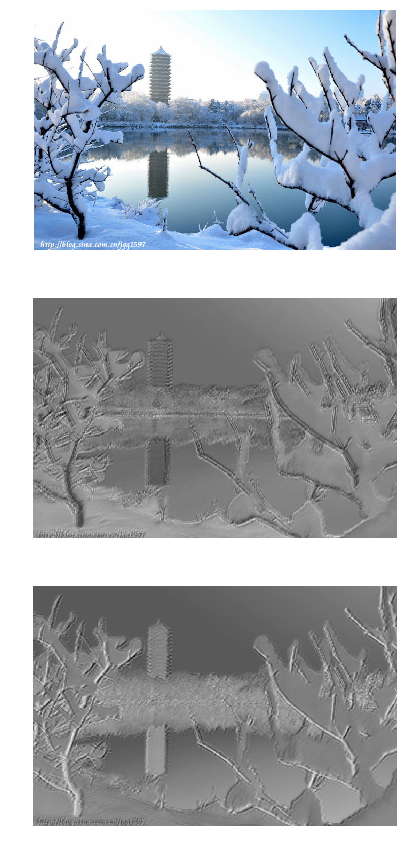

In [12]:
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import pylab
from PIL import Image
import cPickle, gzip, numpy
from theano.tensor.nnet import conv
   
rng = numpy.random.RandomState(23455)
input = T.tensor4(name='input')
   # initialize shared variable for weights.
w_shp = (2, 3, 9, 9)
w_bound = numpy.sqrt(3 * 9 * 9)
W = theano.shared( numpy.asarray(
               rng.uniform(
                   low=-1.0 / w_bound,
                   high=1.0 / w_bound,
                   size=w_shp),
               dtype=input.dtype), name ='W')
   
b_shp = (2,)
b = theano.shared(numpy.asarray(
               rng.uniform(low=-.5, high=.5, size=b_shp),
               dtype=input.dtype), name ='b')

conv_out = conv.conv2d(input, W)
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))
f = theano.function([input], output)
# open random image of dimensions 639x516
img = Image.open('F:/Image Identification/CNN7.jpg')
(width, height) = img.size
img = numpy.asarray(img, dtype='float64') / 256.
# put image in 4D tensor of shape (1, 3, height, width)
img_ = img.swapaxes(0, 2).swapaxes(1, 2).reshape(1, 3, height, width)
filtered_img = f(img_)
   
plt.figure(1,figsize=(7,15))
# plot original image and first and second components of output
pylab.subplot(3, 1, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();
# recall that the convOp output (filtered image) is actually a "minibatch",
# of size 1 here, so we take index 0 in the first dimension:
pylab.subplot(3, 1, 2); pylab.axis('off'); pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(3, 1, 3); pylab.axis('off'); pylab.imshow(filtered_img[0, 1, :, :])
plt.show()